<a href="https://colab.research.google.com/github/skyshine460/Datascience_notebook/blob/main/submit_moving2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリのインポート

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
# pip install catboost

In [117]:
# 初期設定
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV

import lightgbm as lgb
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

import joblib

from scipy import stats
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

In [118]:
is_plot = True

# データの読み込み

In [119]:
df = pd.read_csv('/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/train.csv')
pd.set_option('display.max_columns', None)
df

,datetime,y,client,close,price_am,price_pm
0,2010-07-01,17,0,0,-1,-1
1,2010-07-02,18,0,0,-1,-1
2,2010-07-03,20,0,0,-1,-1
3,2010-07-04,20,0,0,-1,-1
4,2010-07-05,14,0,0,-1,-1
5,2010-07-06,14,0,0,-1,-1
6,2010-07-07,4,0,0,-1,-1
7,2010-07-08,10,0,0,-1,-1
8,2010-07-09,12,0,0,-1,-1
9,2010-07-10,21,0,0,-1,-1


# 簡単なデータの確認

In [120]:
# 各カラムのデータ型と欠損値（nan）を表示
def information_df(df):
    pd.set_option('display.max_rows', None)
    type_series = df.dtypes
    nunique_series = df.nunique()
    nan_count_series = df.isnull().sum()
    unique_values_series = df.apply(lambda col: list(col.unique()))
    info_df = pd.DataFrame({
        'dtypes': type_series,
        'NaN Count': nan_count_series,
        'Nunique': nunique_series,
        'Unique Values': unique_values_series,
    })
    return info_df

print(df.shape)
information_df(df)

(2101, 6)


,dtypes,NaN Count,Nunique,Unique Values
datetime,object,0,2101,"[2010-07-01, 2010-07-02, 2010-07-03, 2010-07-0..."
y,int64,0,99,"[17, 18, 20, 14, 4, 10, 12, 21, 15, 11, 8, 13,..."
client,int64,0,2,"[0, 1]"
close,int64,0,2,"[0, 1]"
price_am,int64,0,7,"[-1, 0, 1, 2, 3, 5, 4]"
price_pm,int64,0,7,"[-1, 0, 1, 2, 3, 4, 5]"




*   求める引っ越し数は１６年度の数字。１６年度より前の過去実績から傾向を予測。
*   一般的に、年間を通して見ると、月別の移動者数（≒引越し者数）は特定の月に大きく偏っている。3月、4月が圧倒的に多く、3月は他の月のおよそ2.5倍、4月はおよそ2倍となっている。
*   clientは法人が絡む特殊な引越し日（オフィス引っ越しなど）
*   closeは休業日
*   priceは料金表。どれくらいの料金かは現状不明。-1は欠損値なので注意。
*   現在の単身の引っ越し見積もり料金相場は、通常期（5月～2月）で28,000円～31,050円、繁忙期（3月・4月）で35,100円～40,000円です。繁忙期は価格が高そう。
*   対応範囲は北海道、宮城、東京、神奈川、埼玉、千葉、愛知、三重、岐阜、大阪、兵庫、京都、奈良、滋賀、広島、福岡、佐賀、熊本、大分



因数分解

引っ越し数 = 総引っ越し数（法人/個人）×対応範囲率（※発着で対応可）×業者選択率

業者選択率：価格、納期（日程）、品質・評判

# 学習データの確認

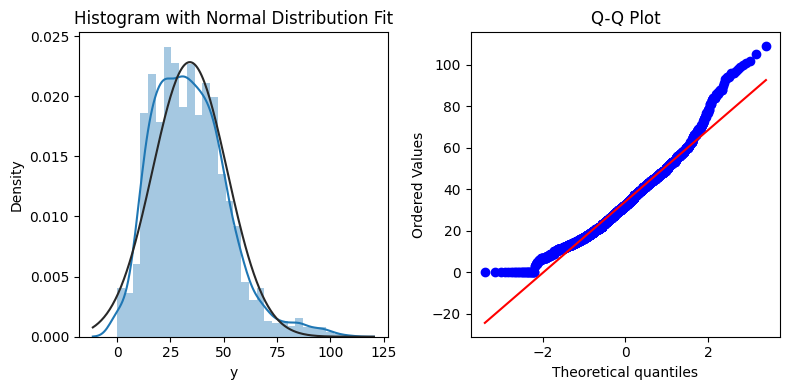

Skewness: 0.7722613806564008
Kurtosis: 1.016158321466305


In [121]:
# 学習データの分布の確認
def normal_distribution_fit(col):
  fig, ax = plt.subplots(1, 2, figsize=(8, 4))

  sns.distplot(df[col], fit=norm, ax=ax[0])
  ax[0].set_title('Histogram with Normal Distribution Fit')

  stats.probplot(df[col], plot=ax[1])
  ax[1].set_title('Q-Q Plot')

  plt.tight_layout()
  plt.show()

  print(f"Skewness: {df[col].skew()}")
  print(f"Kurtosis: {df[col].kurt()}")

normal_distribution_fit('y')

正規分布に近い形となっている。logを取るとどうなるか。

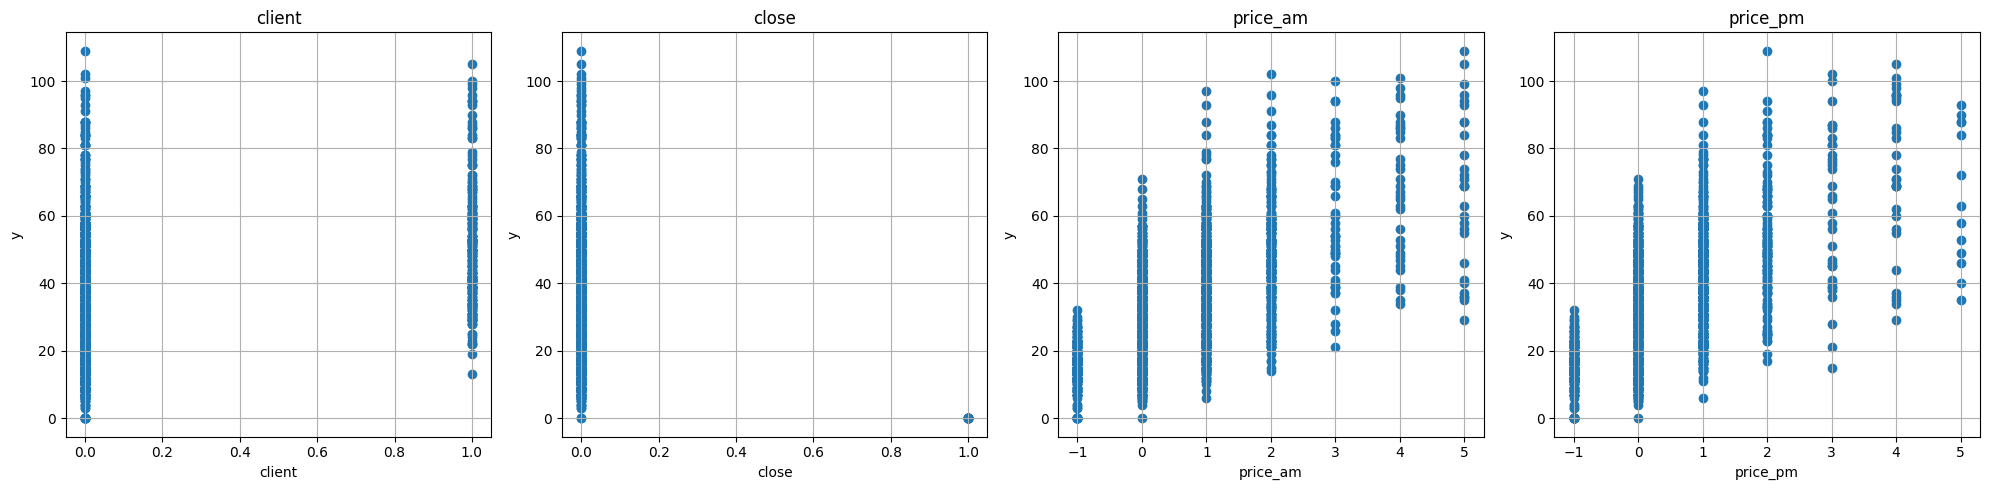

In [122]:
def scatter_plot(x_cols):
  plt.figure(figsize=(len(x_cols)*5, 5))

  for i, col in enumerate(x_cols, start=1):
      plt.subplot(1, len(x_cols), i)
      plt.scatter(x=df[col], y=df["y"])
      plt.title(col)
      plt.xlabel(col)
      plt.ylabel("y")
      # plt.ylim(0, 800000)
      plt.grid(True)

  plt.tight_layout()
  plt.show()

plot_cols = ["client", "close", "price_am", "price_pm"]

if is_plot == True:
  scatter_plot(plot_cols)



*   日付を数値化する。曜日を定義。カレンダーを定義。
*   clientはそのままかな
*   closeは曜日やカレンダーと合わせるとデータの価値が出そう
*   金額は欠損値を平均としていいか。他の数字のほうがいいか



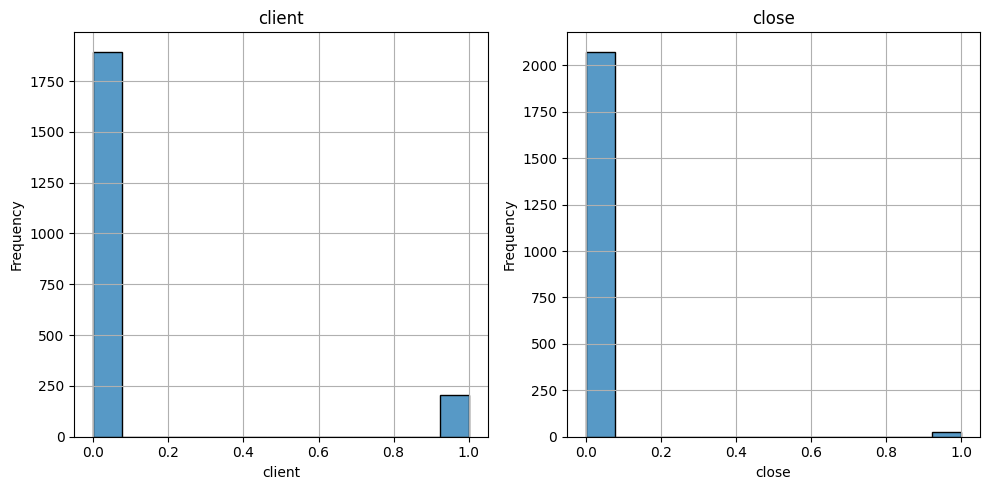

In [123]:
def hist_plot(x_cols):
  plt.figure(figsize=(len(x_cols)*5, 5))

  for i, col in enumerate(x_cols, start=1):
      plt.subplot(1, len(x_cols), i)
      sns.histplot(df[col])
      plt.title(col)
      plt.xlabel(col)
      plt.ylabel("Frequency")
      # plt.ylim(0, 800000)
      plt.grid(True)

  plt.tight_layout()
  plt.show()
plot_cols = ["client", 'close']
if is_plot == True:
  hist_plot(plot_cols)

# ①日時の要素

In [124]:
# datetimeを年月日に分ける
def year_month_day(df):
  df["year"] = df["datetime"].str.split("-", expand=True)[0].astype(np.int64)
  df["month"] = df["datetime"].str.split("-", expand=True)[1].astype(np.int64)
  df["day"] = df["datetime"].str.split("-", expand=True)[2].astype(np.int64)

year_month_day(df)
df.head()

,datetime,y,client,close,price_am,price_pm,year,month,day
0,2010-07-01,17,0,0,-1,-1,2010,7,1
1,2010-07-02,18,0,0,-1,-1,2010,7,2
2,2010-07-03,20,0,0,-1,-1,2010,7,3
3,2010-07-04,20,0,0,-1,-1,2010,7,4
4,2010-07-05,14,0,0,-1,-1,2010,7,5


In [125]:
# Monday:0, Tuseday:1, Wednesday:2, Thursday:3, Friday:4, Saturday:5, Sunday:6,
df["day_of_week"] =  (df.index + 3) % 7
df.head()

,datetime,y,client,close,price_am,price_pm,year,month,day,day_of_week
0,2010-07-01,17,0,0,-1,-1,2010,7,1,3
1,2010-07-02,18,0,0,-1,-1,2010,7,2,4
2,2010-07-03,20,0,0,-1,-1,2010,7,3,5
3,2010-07-04,20,0,0,-1,-1,2010,7,4,6
4,2010-07-05,14,0,0,-1,-1,2010,7,5,0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101 entries, 0 to 2100
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   datetime     2101 non-null   object
 1   y            2101 non-null   int64 
 2   client       2101 non-null   int64 
 3   close        2101 non-null   int64 
 4   price_am     2101 non-null   int64 
 5   price_pm     2101 non-null   int64 
 6   year         2101 non-null   int64 
 7   month        2101 non-null   int64 
 8   day          2101 non-null   int64 
 9   day_of_week  2101 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 164.3+ KB


金額-1の整理


*   2010年7月〜12月は休みではないけど-1が入っている
*   年末年始など休日に入っている。休みの日はすべて-1が入る
*   2011-10-03は午前が1、午後が-1になっている
*   2011-07-01は金額が-1だが、実績yがある

⇨2010年のデータは除外するのもあり
　2011-07-01、2011-10-03は異常値と見るほうが良いかも
　※金額のカラムと休日のカラムが同義になるので注意




In [127]:
# 2011-2014年度を抽出
df_train = df.copy()
df_train = df_train[274:]
df_train = df_train[:-366]

print(df_train.head())
print(df_train.tail())

       datetime   y  client  close  price_am  price_pm  year  month  day  \
274  2011-04-01  48       0      0         4         2  2011      4    1   
275  2011-04-02  29       0      0         5         4  2011      4    2   
276  2011-04-03  28       0      0         3         3  2011      4    3   
277  2011-04-04  23       0      0         2         1  2011      4    4   
278  2011-04-05  25       0      0         1         1  2011      4    5   

     day_of_week  
274            4  
275            5  
276            6  
277            0  
278            1  
        datetime   y  client  close  price_am  price_pm  year  month  day  \
1730  2015-03-27  95       0      0         4         4  2015      3   27   
1731  2015-03-28  88       1      0         5         5  2015      3   28   
1732  2015-03-29  96       0      0         5         4  2015      3   29   
1733  2015-03-30  87       1      0         4         3  2015      3   30   
1734  2015-03-31  75       1      0         

In [128]:
# 週ごとに平均をとる
def add_week_mean(df, day_column, target_column=None, week_mapping=None):
    if week_mapping is None:
        # 'day_of_week' 列ごとに 'y' の平均値を計算して辞書に変換
        day_of_week_mean = df.groupby(day_column)[target_column].mean()
        week_mapping = day_of_week_mean.to_dict()

    # 'day_of_week' 列に基づいて 'week_mean' 列を追加
    df['week_mean'] = df[day_column].map(week_mapping)

    return df, week_mapping

# df_trainで関数を適用してmappingを作成
df_train, week_mapping = add_week_mean(df_train, 'day_of_week', 'y')

# 結果の確認
print(df_train.head(10))

       datetime   y  client  close  price_am  price_pm  year  month  day  \
274  2011-04-01  48       0      0         4         2  2011      4    1   
275  2011-04-02  29       0      0         5         4  2011      4    2   
276  2011-04-03  28       0      0         3         3  2011      4    3   
277  2011-04-04  23       0      0         2         1  2011      4    4   
278  2011-04-05  25       0      0         1         1  2011      4    5   
279  2011-04-06  31       0      0         0         0  2011      4    6   
280  2011-04-07  28       0      0         0         0  2011      4    7   
281  2011-04-08  37       0      0         0         0  2011      4    8   
282  2011-04-09  39       0      0         3         2  2011      4    9   
283  2011-04-10  29       0      0         2         1  2011      4   10   

     day_of_week  week_mean  
274            4  34.430622  
275            5  41.502392  
276            6  38.497608  
277            0  33.550239  
278          

In [129]:
# 月ごとに平均をとる
def add_month_mean(df, column, target_column=None, month_mapping=None):
    if month_mapping is None:
        # 'month' 列ごとに 'y' の平均値を計算して辞書に変換
        month_mean = df.groupby(column)[target_column].mean()
        month_mapping = month_mean.to_dict()

    # 'month' 列に基づいて 'month_mean' 列を追加
    df['month_mean'] = df[column].map(month_mapping)

    return df, month_mapping

# df_trainで関数を適用してmonth_mappingを作成
df_train, month_mapping = add_month_mean(df_train, 'month', 'y')

# 結果の確認
print(df_train.head(5))

       datetime   y  client  close  price_am  price_pm  year  month  day  \
274  2011-04-01  48       0      0         4         2  2011      4    1   
275  2011-04-02  29       0      0         5         4  2011      4    2   
276  2011-04-03  28       0      0         3         3  2011      4    3   
277  2011-04-04  23       0      0         2         1  2011      4    4   
278  2011-04-05  25       0      0         1         1  2011      4    5   

     day_of_week  week_mean  month_mean  
274            4  34.430622   36.716667  
275            5  41.502392   36.716667  
276            6  38.497608   36.716667  
277            0  33.550239   36.716667  
278            1  30.559809   36.716667  


In [130]:
# 日ごとに平均をとる
def add_day_mean(df, column, target_column=None, day_mapping=None):
    if day_mapping is None:
        # 'day' 列ごとに 'y' の平均値を計算して辞書に変換
        day_mean = df.groupby(column)[target_column].mean()
        day_mapping = day_mean.to_dict()

    # 'day' 列に基づいて 'day_mean' 列を追加
    df['day_mean'] = df[column].map(day_mapping)

    return df, day_mapping

# df_trainで関数を適用してday_mappingを作成
df_train, day_mapping = add_day_mean(df_train, 'day', 'y')

# 結果の確認
print(df_train.head(5))

       datetime   y  client  close  price_am  price_pm  year  month  day  \
274  2011-04-01  48       0      0         4         2  2011      4    1   
275  2011-04-02  29       0      0         5         4  2011      4    2   
276  2011-04-03  28       0      0         3         3  2011      4    3   
277  2011-04-04  23       0      0         2         1  2011      4    4   
278  2011-04-05  25       0      0         1         1  2011      4    5   

     day_of_week  week_mean  month_mean   day_mean  
274            4  34.430622   36.716667  37.208333  
275            5  41.502392   36.716667  31.791667  
276            6  38.497608   36.716667  30.000000  
277            0  33.550239   36.716667  29.208333  
278            1  30.559809   36.716667  27.625000  


In [131]:
# 年ごとに平均をとる
def add_year_mean(df, column, target_column=None, year_mapping=None):
    if year_mapping is None:
        # 'year' 列ごとに 'y' の平均値を計算して辞書に変換
        year_mean = df.groupby(column)[target_column].mean()
        year_mapping = year_mean.to_dict()

    # 'year' 列に基づいて 'year_mean' 列を追加
    df['year_mean'] = df[column].map(year_mapping)

    return df, year_mapping

# df_trainで関数を適用してyear_mappingを作成
df_train, year_mapping = add_year_mean(df_train, 'year', 'y')

# 結果の確認
print(year_mapping)

{2011: 18.243636363636362, 2012: 30.5, 2013: 40.320547945205476, 2014: 39.66575342465753, 2015: 49.611111111111114}


In [132]:
from sklearn.linear_model import LinearRegression

data = {2011: 18.243636363636362, 2012: 30.5, 2013: 40.320547945205476, 2014: 39.66575342465753, 2015: 49.611111111111114}

# データを整理
years = np.array(list(data.keys())).reshape(-1, 1)  # 年を特徴量に
values = np.array(list(data.values()))  # 値をターゲットに

# 線形回帰モデルの作成
model = LinearRegression()

# モデルの訓練
model.fit(years, values)

# 2016年の値を予測
year_to_predict = np.array([[2016]])
predicted_value = model.predict(year_to_predict)

print(f"2016年の予測値: {predicted_value[0]:.2f}")

2016年の予測値: 57.24


# 特徴量選択

In [133]:
features = [
    "client", "close", "price_am", "price_pm", "year", "month", "day", "week_mean", "month_mean"
]

# モデル作成

In [134]:
# 初期値
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.1,
    'num_leaves': 16,
    'n_estimators': 100000,
    "random_state": 123,
    "importance_type": "gain",
}

時系列データなのでシャッフルするとリークになる。2015年度のデータを評価データとする

In [135]:
# 2015年度を評価データに
df_pred = df[-366:]
df_pred.head()

,datetime,y,client,close,price_am,price_pm,year,month,day,day_of_week
1735,2015-04-01,61,1,0,3,3,2015,4,1,2
1736,2015-04-02,60,1,0,2,2,2015,4,2,3
1737,2015-04-03,75,1,0,2,1,2015,4,3,4
1738,2015-04-04,86,1,0,4,3,2015,4,4,5
1739,2015-04-05,69,1,0,2,2,2015,4,5,6


In [136]:
# df_predに対してweek_mappingを適用
df_pred, _ = add_week_mean(df_pred, 'day_of_week', week_mapping=week_mapping)
df_pred.head()

,datetime,y,client,close,price_am,price_pm,year,month,day,day_of_week,week_mean
1735,2015-04-01,61,1,0,3,3,2015,4,1,2,29.740385
1736,2015-04-02,60,1,0,2,2,2015,4,2,3,30.475962
1737,2015-04-03,75,1,0,2,1,2015,4,3,4,34.430622
1738,2015-04-04,86,1,0,4,3,2015,4,4,5,41.502392
1739,2015-04-05,69,1,0,2,2,2015,4,5,6,38.497608


In [137]:
# df_predに対してmonth_mappingを適用
df_pred, _ = add_month_mean(df_pred, 'month', month_mapping=month_mapping)
df_pred.head()

,datetime,y,client,close,price_am,price_pm,year,month,day,day_of_week,week_mean,month_mean
1735,2015-04-01,61,1,0,3,3,2015,4,1,2,29.740385,36.716667
1736,2015-04-02,60,1,0,2,2,2015,4,2,3,30.475962,36.716667
1737,2015-04-03,75,1,0,2,1,2015,4,3,4,34.430622,36.716667
1738,2015-04-04,86,1,0,4,3,2015,4,4,5,41.502392,36.716667
1739,2015-04-05,69,1,0,2,2,2015,4,5,6,38.497608,36.716667


In [138]:
# df_predに対してday_mappingを適用
df_pred, _ = add_day_mean(df_pred, 'day', day_mapping=day_mapping)
df_pred.head()

,datetime,y,client,close,price_am,price_pm,year,month,day,day_of_week,week_mean,month_mean,day_mean
1735,2015-04-01,61,1,0,3,3,2015,4,1,2,29.740385,36.716667,37.208333
1736,2015-04-02,60,1,0,2,2,2015,4,2,3,30.475962,36.716667,31.791667
1737,2015-04-03,75,1,0,2,1,2015,4,3,4,34.430622,36.716667,30.000000
1738,2015-04-04,86,1,0,4,3,2015,4,4,5,41.502392,36.716667,29.208333
1739,2015-04-05,69,1,0,2,2,2015,4,5,6,38.497608,36.716667,27.625000


In [139]:
# df_predに対してyear_mappingを適用
df_pred["year_mean"] = 57.24
df_pred.head()

,datetime,y,client,close,price_am,price_pm,year,month,day,day_of_week,week_mean,month_mean,day_mean,year_mean
1735,2015-04-01,61,1,0,3,3,2015,4,1,2,29.740385,36.716667,37.208333,57.24
1736,2015-04-02,60,1,0,2,2,2015,4,2,3,30.475962,36.716667,31.791667,57.24
1737,2015-04-03,75,1,0,2,1,2015,4,3,4,34.430622,36.716667,30.000000,57.24
1738,2015-04-04,86,1,0,4,3,2015,4,4,5,41.502392,36.716667,29.208333,57.24
1739,2015-04-05,69,1,0,2,2,2015,4,5,6,38.497608,36.716667,27.625000,57.24


In [140]:
# 特徴量とターゲットの設定
X_train = df_train[features]
y_train = df_train["y"]

X_pred = df_pred[features]
X_pred = X_pred.drop(columns=["y"], errors='ignore')
y_pred_true = df_pred["y"]

# LightGBMモデルの作成と訓練
model = lgb.LGBMRegressor(**params)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_pred, y_pred_true)],
    callbacks=[
        lgb.early_stopping(stopping_rounds=100, verbose=True),
        lgb.log_evaluation(0)
    ],
)

# 訓練データと評価データの予測
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_pred)

# 評価指標の計算 (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_pred = mean_absolute_error(y_pred_true, y_pred)

print(f"[MAE] train: {mae_train:.2f}, pred: {mae_pred:.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 8
[LightGBM] [Info] Start training from score 34.113621
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[106]	training's l1: 3.74488	valid_1's l1: 7.67348
[MAE] train: 3.74, pred: 7.67


In [141]:
# 特徴量重要度の取得
imp = pd.DataFrame({
    "col": X_train.columns,
    "imp": model.feature_importances_
})

# 特徴量重要度の表示
print(imp.sort_values(by="imp", ascending=False))

          col            imp
4        year  578194.365757
8  month_mean  353923.566164
2    price_am  320276.659887
3    price_pm  224986.396442
6         day  223910.885643
5       month   75218.707992
7   week_mean   40795.589424
0      client     803.082401
1       close       0.000000


In [142]:
df_val = df.copy()
df_val['y_pred'] = np.nan

# 1734行目までは、dfのy列の値をそのまま代入
df_val.loc[:1734, 'y_pred'] = df_val.loc[:1734, 'y']

# 1735行目以降にモデルで作成したy_predの値を代入
df_val.loc[1735:, 'y_pred'] = y_pred[:len(df) - 1735]

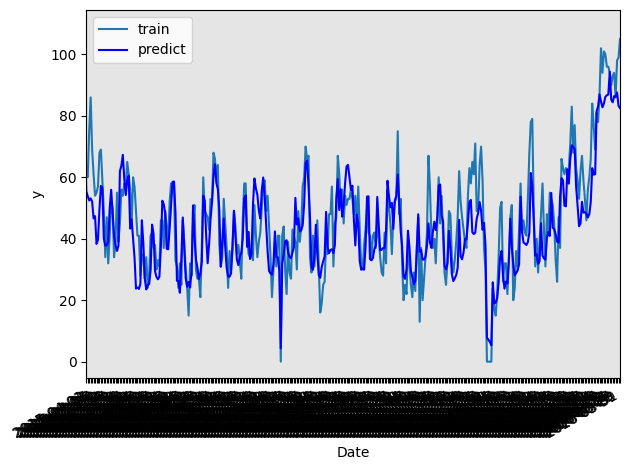

In [143]:
fig, ax = plt.subplots()

ax.plot(df_val['datetime'], df['y'], label='train')
ax.plot(df_val['datetime'], df_val['y_pred'], 'b-', label='predict')

ax.set_xlabel('Date')
ax.set_ylabel('y')
ax.axvspan(1735, 2100, color='#808080', alpha=0.2)

ax.legend(loc=2)

# plt.xticks(
#     np.arange(0, 2100, 365),
#     ["2011", "2012", "2013", "2014", "2015", "2016"]
# )
ax.set_xlim(1735, 2100)

fig.autofmt_xdate()
plt.tight_layout()

In [144]:
df_val = df_val[-366:]

# 表示

# Submission

In [145]:
test = pd.read_csv('/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/test.csv')
test.shape

(365, 5)

In [146]:
test.head()

,datetime,client,close,price_am,price_pm
0,2016-04-01,1,0,3,2
1,2016-04-02,0,0,5,5
2,2016-04-03,1,0,2,2
3,2016-04-04,1,0,1,1
4,2016-04-05,0,0,1,1


In [147]:
# 年月日に分ける
year_month_day(test)

In [148]:
# Monday:0, Tuseday:1, Wednesday:2, Thursday:3, Friday:4, Saturday:5, Sunday:6,
test["day_of_week"] =  (test.index + 4) % 7

In [149]:
# testに対してweek_mappingを適用
test, _ = add_week_mean(test, 'day_of_week', week_mapping=week_mapping)
test.head()

,datetime,client,close,price_am,price_pm,year,month,day,day_of_week,week_mean
0,2016-04-01,1,0,3,2,2016,4,1,4,34.430622
1,2016-04-02,0,0,5,5,2016,4,2,5,41.502392
2,2016-04-03,1,0,2,2,2016,4,3,6,38.497608
3,2016-04-04,1,0,1,1,2016,4,4,0,33.550239
4,2016-04-05,0,0,1,1,2016,4,5,1,30.559809


In [150]:
# testに対してmonth_mappingを適用
test, _ = add_month_mean(test, 'month', month_mapping=month_mapping)
test.head()

,datetime,client,close,price_am,price_pm,year,month,day,day_of_week,week_mean,month_mean
0,2016-04-01,1,0,3,2,2016,4,1,4,34.430622,36.716667
1,2016-04-02,0,0,5,5,2016,4,2,5,41.502392,36.716667
2,2016-04-03,1,0,2,2,2016,4,3,6,38.497608,36.716667
3,2016-04-04,1,0,1,1,2016,4,4,0,33.550239,36.716667
4,2016-04-05,0,0,1,1,2016,4,5,1,30.559809,36.716667


In [151]:
X_test = test[features]
X_test.shape

(365, 9)

In [152]:
y_test_pred = model.predict(X_test)

df_submit = pd.DataFrame({
    'datetime': test["datetime"],
    'y': y_test_pred
})

df_submit.head()

,datetime,y
0,2016-04-01,61.393251
1,2016-04-02,54.133458
2,2016-04-03,52.763647
3,2016-04-04,47.045527
4,2016-04-05,47.020034


In [154]:
df_submit.to_csv("submit_moving2.csv", index=False, header=False)